<a href="https://colab.research.google.com/github/akash1706/CRUD-Using-OOP-PHP-and-MYSQLI/blob/master/16_10_20_DR_92_Inception_v3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip3 install keras==2.2.2
#!pip3 install tensorflow==1.5.0 #1.5.0 working
!pip3 install git+git://github.com/raghakot/keras-vis.git --upgrade --no-deps
!pip install --upgrade tf-keras-vis tensorflow matplotlib
!pip3 install scipy==1.1.0
!pip3 install matplotlib==3.1.0 #cannot import name '_png' from 'matplotlib' er solve er jonno

  Cloning git://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-p5y5ymjq
  Running command git clone -q git://github.com/raghakot/keras-vis.git /tmp/pip-req-build-p5y5ymjq
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=38887 sha256=3d34203ed6532eb03659d2e0db723e9d81a79743b3088d53117585c018c302df
  Stored in directory: /tmp/pip-ephem-wheel-cache-al7xu5i4/wheels/ff/01/8e/3a66d951f9b53f9894a010107b05253fb9a6c6f2555a5aaeca
Successfully built keras-vis
  Found existing installation: keras-vis 0.5.0
    Uninstalling keras-vis-0.5.0:
      Successfully uninstalled keras-vis-0.5.0
Requirement already up-to-date: tf-keras-vis in /usr/local/lib/python3.6/dist-packages (0.5.3)
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.3.1)
  Using cached https://files.pythonhosted.org/packages/cd/d6/8c4dfb23151d5a494c66ebbfdb5c8c433b44ec07fae52da5939fcda0943f/matplotlib-3.3.2-cp36-cp36m-manylinux1_x86_64.whl
ERROR: plotnine 0

  Using cached https://files.pythonhosted.org/packages/da/83/d989ee20c78117c737ab40e0318ea221f1aed4e3f5a40b4f93541b369b93/matplotlib-3.1.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.3.2
    Uninstalling matplotlib-3.3.2:
      Successfully uninstalled matplotlib-3.3.2


In [2]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, MaxPool2D

import os
import time

from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import merge, Input
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import GlobalAveragePooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam


In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from glob import glob
from sklearn.model_selection import train_test_split

G1 = glob('/content/drive/My Drive/Colab Notebooks/DR up/G1/*.jpeg')

G2 = glob('/content/drive/My Drive/Colab Notebooks/DR up/G2/*.jpeg')
G3 = glob('/content/drive/My Drive/Colab Notebooks/DR up/G3/*.jpeg')
G4 = glob('/content/drive/My Drive/Colab Notebooks/DR up/G4/*.jpeg')

G1_train, G1_test = train_test_split(G1, test_size=0.20)
G2_train, G2_test = train_test_split(G2, test_size=0.20)
G3_train, G3_test = train_test_split(G3, test_size=0.20)
G4_train, G4_test = train_test_split(G4, test_size=0.20)

TRAIN_DIR = '/content/drive/My Drive/Colab Notebooks/DR up'
TEST_DIR = '/content/drive/My Drive/Colab Notebooks/Test_data'


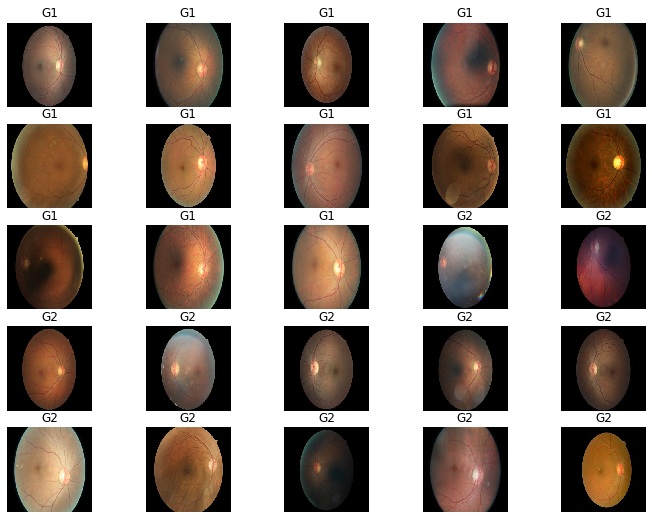

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

G1 = np.random.choice(G1_train, 13)
G2 = np.random.choice(G2_train, 12)

data = np.concatenate((G1, G2))
labels = 13 * ['G1'] + 12 *['G2']

N, R, C = 25, 5, 5
plt.figure(figsize=(12, 9))
for k, (src, label) in enumerate(zip(data, labels)):
    im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(label)
    plt.imshow(np.asarray(im))
    plt.axis('off')



In [11]:
import tensorflow as tf
import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.models import Sequential

#from tensorflow.keras.applications.resNet50 import preprocess_input
import numpy as np
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import regularizers

base_model =InceptionV3(weights='imagenet', include_top=True, input_shape=(299, 299, 3))

# add a global spatial average pooling layer
x = base_model.output

# let's add a fully-connected layer\
#x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x=Dropout(0.4)(x)
x = Dense(4096, activation='relu')(x)
x=Dropout(0.4)(x)

x = Dense(1024, activation='relu')(x)

predictions = Dense(4, activation= 'softmax')(x)


len(base_model.layers)


# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)
for layer in model.layers[:-84]:
    layer.trainable = False


model.compile(optimizer=Adam(lr=0.00001),   #tensorflow 1.5.0 te lr & 2.3 te learning_rate
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 32

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 2800 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


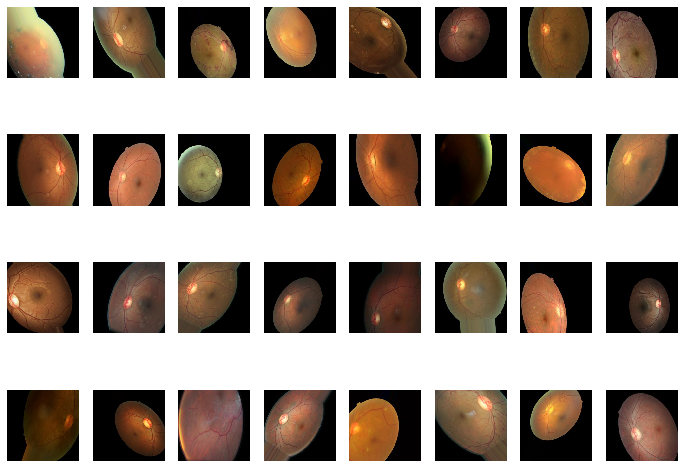

In [9]:
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    plt.subplot(4, 8, k+1)
    plt.imshow((img + 1) / 2)
    plt.axis('off')

In [12]:
EPOCHS = 100
BATCH_SIZE = 32
#STEPS_PER_EPOCH = 320
#VALIDATION_STEPS = 64

MODEL_FILE = '/content/drive/My Drive/Colab Notebooks/model/inceptionv3.model'

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator)
  
model.save(MODEL_FILE)

Epoch 1/100
88/88 [==============================] - 79s 896ms/step - loss: 1.3823 - accuracy: 0.2818 - val_loss: 1.3852 - val_accuracy: 0.3411
Epoch 2/100
88/88 [==============================] - 76s 869ms/step - loss: 1.3644 - accuracy: 0.3507 - val_loss: 1.3797 - val_accuracy: 0.4000
Epoch 3/100
88/88 [==============================] - 76s 869ms/step - loss: 1.3156 - accuracy: 0.3982 - val_loss: 1.3560 - val_accuracy: 0.4232
Epoch 4/100
88/88 [==============================] - 77s 874ms/step - loss: 1.2603 - accuracy: 0.4525 - val_loss: 1.3214 - val_accuracy: 0.4429
Epoch 5/100
88/88 [==============================] - 77s 871ms/step - loss: 1.2008 - accuracy: 0.4736 - val_loss: 1.2555 - val_accuracy: 0.4911
Epoch 6/100
88/88 [==============================] - 77s 870ms/step - loss: 1.1509 - accuracy: 0.4911 - val_loss: 1.1919 - val_accuracy: 0.5054
Epoch 7/100
88/88 [==============================] - 77s 875ms/step - loss: 1.1173 - accuracy: 0.4939 - val_loss: 1.1350 - val_accuracy:

In [13]:
score = model.evaluate(validation_generator, verbose=1)
print('\n', 'Test accuracy:', score[1])

18/18 [==============================] - 12s 671ms/step - loss: 0.1867 - accuracy: 0.9268

 Test accuracy: 0.9267857074737549


# **Accuracy & loss history**

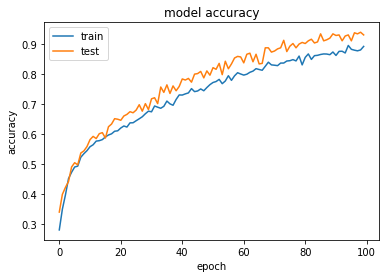

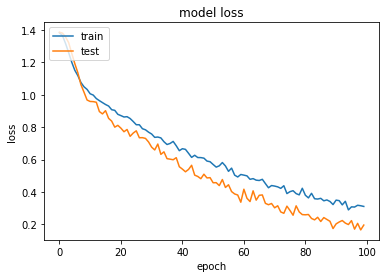

<Figure size 432x288 with 0 Axes>

In [23]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('/content/drive/My Drive/Colab Notebooks/model/model_accuracy_inceptionnet.png')
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('/content/drive/My Drive/Colab Notebooks/model/model_loss_inceptionnet.png')

#Attention with Saliency and Class Activation Map
This notebook explain how to get various attention images with Saliency, SmoothGrad, GradCAM, GradCAM++ and ScoreCAM/Faster-ScoreCAM. **bold text**

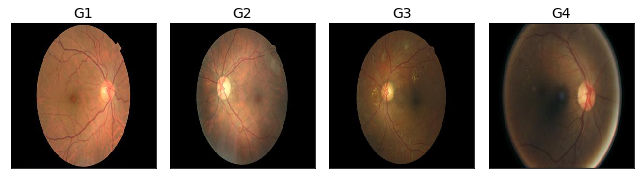

In [15]:
import matplotlib
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from matplotlib import pyplot as plt

# Image titles
image_titles = ['G1', 'G2', 'G3', 'G4']

# Load images
img1 = load_img('/content/drive/My Drive/Colab Notebooks/Test_data/G1/9868_right.jpeg', target_size=(299, 299))
img2 = load_img('/content/drive/My Drive/Colab Notebooks/Test_data/G2/4657_left.jpeg', target_size=(299, 299))
img3 = load_img('/content/drive/My Drive/Colab Notebooks/Test_data/G3/37426_left.jpeg', target_size=(299, 299))
img4 = load_img('/content/drive/My Drive/Colab Notebooks/Test_data/G4/33003_left.jpeg', target_size=(299, 299))
images = np.asarray([np.array(img1), np.array(img2), np.array(img3), np.array(img4)])

# Preparing input data
X = preprocess_input(images)

# Rendering
subplot_args = { 'nrows': 1, 'ncols': 4, 'figsize': (9, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }
f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(images[i])
plt.tight_layout()
plt.show()


In [16]:
#Define Loss functions
#You MUST define loss function that return target scores. Here, it returns the scores corresponding Goldfish, Bear, Assault Rifle.

# The `output` variable refer to the output of the model,
# so, in this case, `output` shape is `(3, 1000)` i.e., (samples, classes).
def loss(output):
    # 1 is the imagenet index corresponding to Goldfish, 294 to Bear and 413 to Assault Rifle.
    #G1 = 0 ,G2 = 1, G3 = 2 , G4 = 3
    return (output[0][0], output[1][1], output[2][2],output[3][3])

In [17]:

#Define Model-Modifier function
#Then, when the softmax activation function is applied to the last layer of model, it may obstruct generating the attention images, so you need to replace the function to a linear function. Here, we does so using model_modifier.

def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

# **Vanilla Saliency**
#Saliency generate the saliency map that appears input regions that a change in the input value contribute the output value.

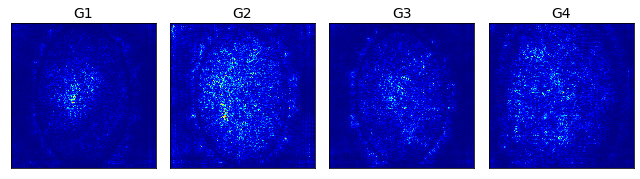

CPU times: user 820 ms, sys: 395 ms, total: 1.22 s
Wall time: 983 ms


In [18]:


%%time
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

# Create Saliency object.
# If `clone` is True(default), the `model` will be cloned,
# so the `model` instance will be NOT modified, but it takes a machine resources.
saliency = Saliency(model,
                    model_modifier=model_modifier,
                    clone=False)

# Generate saliency map
saliency_map = saliency(loss, X)
saliency_map = normalize(saliency_map)

# Render
f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()

# **SMOOTHGRAD**
As you can see avobe, Vanilla Saliency map is too noisy, so let's remove noise in the saliency map using SmoothGrad! SmoothGrad is a method that reduce noise including saliency map by adding noise to input image.

Note: Because SmoothGrad calculates gradients repeatedly, it takes much time around 2-3 minutes when using CPU.

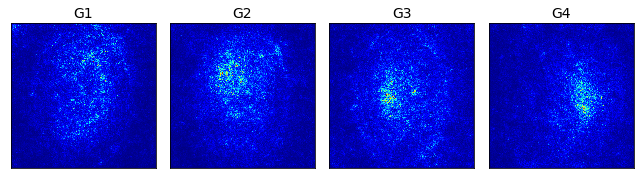

In [19]:


# Create Saliency object.
saliency = Saliency(model,
                    model_modifier=model_modifier,
                    clone=False)

# Generate saliency map with smoothing that reduce noise by adding noise
saliency_map = saliency(loss,
                        X,
                        smooth_samples=2, # The number of calculating gradients iterations.
                        smooth_noise=0.20) # noise spread level.
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
#plt.savefig('images/smoothgrad.png')
plt.show()

# **GradCAM**
Saliency is one of useful way of visualizing attention that appears input regions that a change in the input value contribute the output value. GradCAM is another way of visualizing attention over input. Instead of using gradients with respect to model outputs, it uses penultimate (pre Dense layer) Conv layer output.

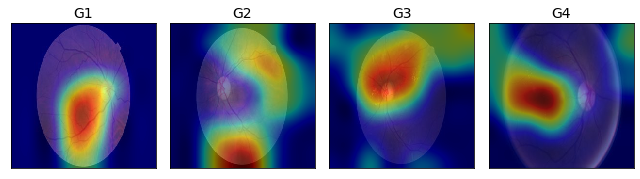

CPU times: user 820 ms, sys: 220 ms, total: 1.04 s
Wall time: 806 ms


In [20]:
%%time

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

# Create Gradcam object
gradcam = Gradcam(model,
                  model_modifier=model_modifier,
                  clone=False)

# Generate heatmap with GradCAM
cam = gradcam(loss,
              X,
              penultimate_layer=-1, # model.layers number
             )
cam = normalize(cam)

f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
plt.tight_layout()
plt.show()

# **GradCAM++**
GradCAM++ can provide better visual explanations of CNN model predictions. In tf-keras-vis, GradcamPlusPlus (GradCAM++) class has most of compatibility with Gradcam. So you can use GradcamPlusPlus if you just replace classname from Gradcam to GradcamPlusPlus.

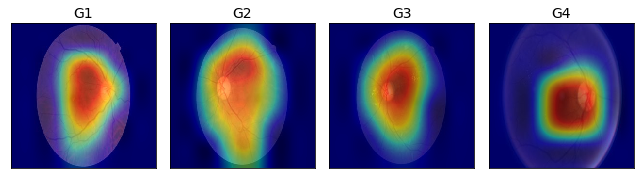

CPU times: user 775 ms, sys: 220 ms, total: 995 ms
Wall time: 762 ms


In [21]:

%%time

from tf_keras_vis.gradcam import GradcamPlusPlus

# Create GradCAM++ object, Just only repalce class name to "GradcamPlusPlus"
# gradcam = Gradcam(model, model_modifier, clone=False)
gradcam = GradcamPlusPlus(model,
                          model_modifier,
                          clone=False)

# Generate heatmap with GradCAM++
cam = gradcam(loss,
              X,
              penultimate_layer=-1, # model.layers number
             )
cam = normalize(cam)

f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
plt.tight_layout()
#plt.savefig('images/gradcam_plus_plus.png')
plt.show()

# **ScoreCAM**
Lastly, Here, we show you ScoreCAM. SocreCAM is an another method that generate Class Activation Map. The characteristic is that it's the gradient-free CAM method unlike GradCAM/GradCAM++.

In default, this method takes too much time, so in the cell below ScoreCAM is NOT run with CPU.

1 GPUs


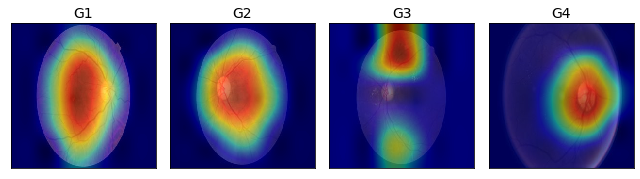

CPU times: user 3min 32s, sys: 1.5 s, total: 3min 34s
Wall time: 3min 33s


In [22]:
%%time

from tf_keras_vis.scorecam import ScoreCAM
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('{} GPUs'.format(gpus))


# Create ScoreCAM object
scorecam = ScoreCAM(model, model_modifier, clone=False)

# This cell takes toooooooo much time, so only doing with GPU.
if gpus > 0:
    # Generate heatmap with ScoreCAM
    cam = scorecam(loss,
                   X,
                   penultimate_layer=-1, # model.layers number
                  )
    cam = normalize(cam)

    f, ax = plt.subplots(**subplot_args)
    for i, title in enumerate(image_titles):
        heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
        ax[i].set_title(title, fontsize=14)
        ax[i].imshow(images[i])
        ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    plt.tight_layout()
    #plt.savefig('/content/drive/My Drive/Colab Notebooks/map_output/example/scorecam.png')
    plt.show()